# Metrics plots

In [148]:
from __future__ import print_function, division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [149]:
df = pd.read_csv('metrics_results.csv',header=[1,2],index_col=0)


In [150]:
df

LSTM                               \
                               kettle dish washer fridge microwave   
f1_score                         0.72        0.47   0.02      0.55   
precision_score                  0.08        0.29   0.04      0.75   
recall_score                     0.35        0.98   0.33      0.03   
accuracy_score                   0.78        0.68   0.65      0.60   
relative_error_in_total_energy   0.73        0.47   0.48      0.93   
mean_absolute_error             12.00       34.00  56.00     43.00   

                                               GRU                     \
                               washer dryer kettle dish washer fridge   
f1_score                               0.45   0.87        0.43   0.83   
precision_score                        0.77   0.92        0.93   0.02   
recall_score                           0.87   0.69        0.82   0.89   
accuracy_score                         0.22   0.18        0.72   0.50   
relative_error_in_total_energy         0.59   0.77        0.10   0.52   
mean_absolute_error                   32.00  76.00       45.00  76.00   

                                                         DAE              \
                               microwave washer dryer kettle dish washer   
f1_score                            0.27         0.73   0.38        0.41   
precision_score                     0.67         0.90   0.27        0.66   
recall_score                        0.29         0.91   0.02        0.05   
accuracy_score                      0.42         0.01   0.47        0.89   
relative_error_in_total_energy      0.86         0.03   0.85        0.00   
mean_absolute_error                87.00        71.00  12.00       32.00   

                                                             DresNet  \
                               fridge microwave washer dryer  kettle   
f1_score                         0.31      0.48         0.42    0.29   
precision_score                  0.88      0.38         0.65    0.87   
recall_score                     0.32      0.65         0.51    0.38   
accuracy_score                   0.87      0.30         0.85    0.32   
relative_error_in_total_energy   0.01      0.66         0.23    0.95   
mean_absolute_error             33.00     21.00        36.00   54.00   

                                                                          
                               dish washer fridge microwave washer dryer  
f1_score                              0.63   0.39      0.61         0.80  
precision_score                       0.40   0.89      0.11         0.03  
recall_score                          0.84   0.52      0.37         0.33  
accuracy_score                        0.64   0.39      0.07         0.20  
relative_error_in_total_energy        0.24   0.43      0.80         0.31  
mean_absolute_error                  56.00  76.00     45.00        34.00

In [151]:
df['GRU']['kettle']['precision_score']

0.92

In [152]:
APPLIANCES = [
    'fridge',
    'kettle',
    'washer dryer',
    'dish washer',
    'microwave'
]

METRICS = [
    'f1_score',
    'precision_score',
    'recall_score',
    'accuracy_score',
    'relative_error_in_total_energy',
    'mean_absolute_error'
]

ALGORITHMS = [
    'LSTM',
    'GRU',
    'DAE',
    'DresNet'
    
]

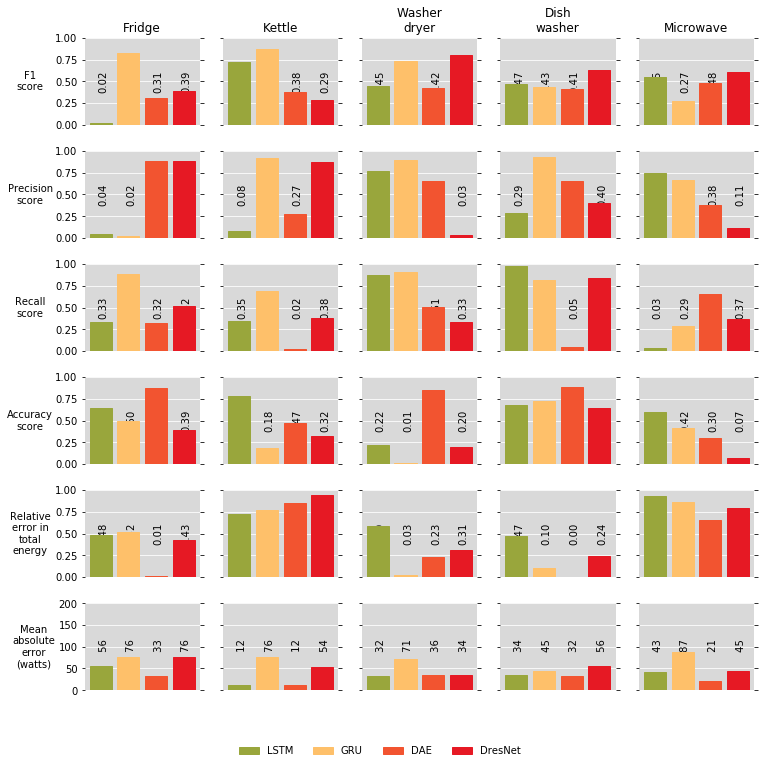

In [168]:
COLOR = [ '#99A63C', '#FEC06A', '#F25430', '#E61924']#'#5F7343',
nrows = len(METRICS)
ncols = len(APPLIANCES)
x = range(len(ALGORITHMS))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharey='row', figsize=(12, 12))
fig.patch.set_facecolor('white')
for row_i, metric in enumerate(METRICS):
    for col_i, appliance in enumerate(APPLIANCES):
        ax = axes[row_i, col_i]
        scores_for_algorithms = []
        for algo in ALGORITHMS:
            try:
                scores_for_algorithms.append(df[algo][appliance][metric])
            except:
                scores_for_algorithms.append(0)
        rects = ax.bar(
            x, scores_for_algorithms, color=COLOR, edgecolor=COLOR, zorder=4)

        # Numbers on the plot
        if row_i == 5:  # mean absolute error (watts)
            text_y = 100
            text_format = '{:3.0f}'
        else:
            text_y = 0.5
            text_format = '{:.2f}'

        # Draw text
        for i, rect in enumerate(rects):
            ax.text(
                rect.get_x() + rect.get_width() / 2.5,
                text_y,
                text_format.format(scores_for_algorithms[i]),
                va='center', rotation=90)

        # Formatting
        ax.set_xticks([])
        ax.tick_params(direction='out')
        ax.yaxis.grid(
            b=True, which='major', color='white', linestyle='-', zorder=3)
        ax.patch.set_facecolor((0.85, 0.85, 0.85))

        if row_i == 4:  # relative error in total energy
            ax.set_ylim((-1, 1))
            
        if row_i == 5 :  # relative error in total energy
            ax.set_ylim((0, 200))
            
        #elif row_i == 4:  # relative error in total energy
         #   ax.set_ylim((-1, 1))
            
        else:
            ax.set_ylim(0,1)

        for spine in ['top', 'right', 'left', 'bottom']:
            ax.spines[spine].set_visible(False)

        if row_i == 0:
            if appliance == 'across all appliances':
                label = 'Across all\nappliances'
            else:
                label = appliance.replace(' ', '\n')
                label = label[0].capitalize() + label[1:]
            ax.set_title(label)
        if col_i == 0:
            label = metric.replace('_', '\n')
            if label == 'mean\nabsolute\nerror':
                label = label + '\n(watts)'
            elif label == 'total\nenergy\ncorrectly\nassigned':
                label = 'prop. of\n' + label
            elif label == 'relative\nerror\nin\ntotal\nenergy':
                label = 'relative\nerror in\ntotal\nenergy'
            label = label[0].capitalize() + label[1:]
            ylabel = ax.set_ylabel(label)
            ylabel.set_rotation('horizontal')
            ylabel.set_verticalalignment('center')
            ylabel.set_horizontalalignment('center')
            ax.yaxis.labelpad = 25
            ax.tick_params(axis='y', left='on', right='off')
        else:
            ax.tick_params(axis='y', left='off', right='off')

plt.subplots_adjust(hspace=0.3)
plt.legend(rects, ALGORITHMS, ncol=len(ALGORITHMS), loc=(-3.5, -0.8),
           frameon=False)



path = 'C:/Users/dimit/Desktop/Msc Business Analytics/Dissertation/report/metrics.png'
plt.savefig(path, format='png',bbox_inches='tight')

plt.show()